# **Install Dependencies and Setup**

In [33]:
import numpy as np
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [2]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [3]:
#remove dodgy images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# **Load Data**

In [44]:
#Load Data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 854 files belonging to 2 classes.


In [45]:
data_interator = data.as_numpy_iterator()

In [46]:
#gets another batch from the iterator
batch = data_interator.next()

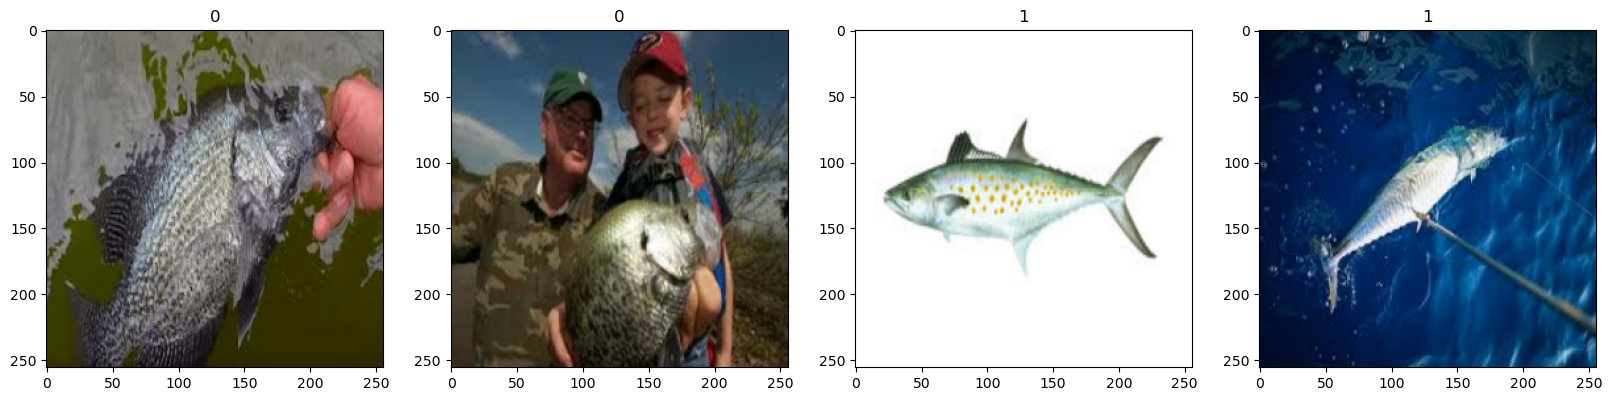

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Preprocess Data**

In [48]:
#Scale Data
data = data.map(lambda x,y: (x/255, y))

In [49]:
data.as_numpy_iterator().next()

(array([[[[2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          ...,
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01],
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01],
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01]],
 
         [[2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          ...,
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01],
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01],
          [3.05882365e-01, 6.03921592e-01, 9.33333337e-01]],
 
         [[2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          [2.98039228e-01, 5.88235319e-01, 9.29411769e-01],
          ...,
          [3.05882365e-01, 6.03921592e-01, 9.3333

# **Split Data**

In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)                  

# **Build the Learning Model**

In [52]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
# Build the Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 # **Train**

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.5547 - loss: 1.2323 - val_accuracy: 0.5500 - val_loss: 0.6534
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.5889 - loss: 0.6584 - val_accuracy: 0.5938 - val_loss: 0.6739
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.6519 - loss: 0.6604 - val_accuracy: 0.7000 - val_loss: 0.5966
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.7467 - loss: 0.5390 - val_accuracy: 0.7750 - val_loss: 0.5468
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.7968 - loss: 0.4717 - val_accuracy: 0.7500 - val_loss: 0.5705
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.7836 - loss: 0.4318 - val_accuracy: 0.8125 - val_loss: 0.4453
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.7971 - loss: 0.4480 - val_accuracy: 0.7437 - val_loss: 0.5635
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.8412 - loss: 0.4262 - val_accuracy: 0

# **Plot Performance**

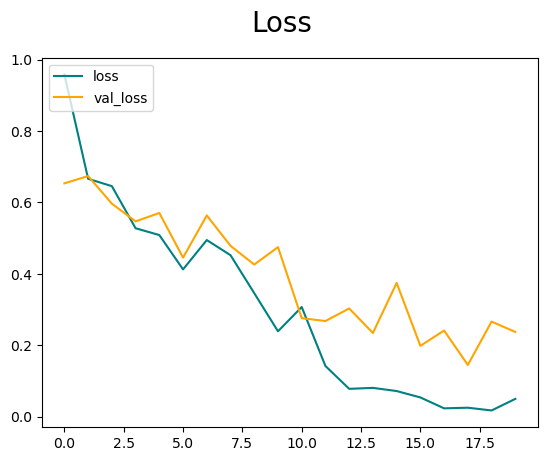

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

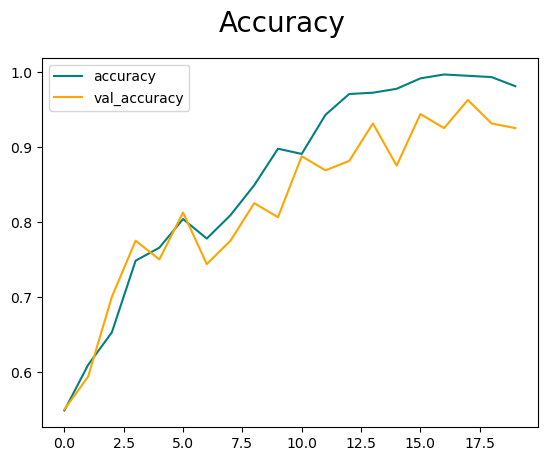

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [65]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9259259104728699, Recall:0.8928571343421936, Accuracy:0.921875


 Test

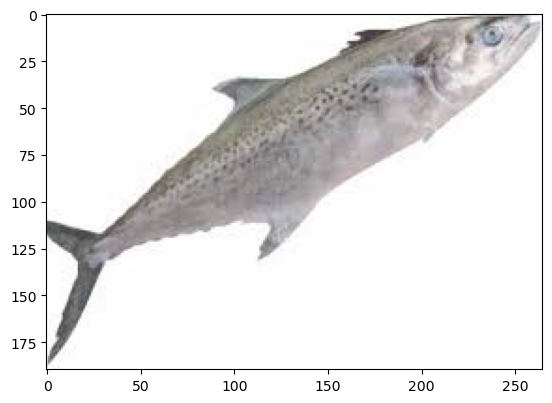

In [94]:
img = cv2.imread(r'C:\Users\jeff\OneDrive\Documents\GitHub\Fish-Species-Identification-CNN\data\test\king_mackerel_test.jpg')
plt.imshow(img)
plt.show()


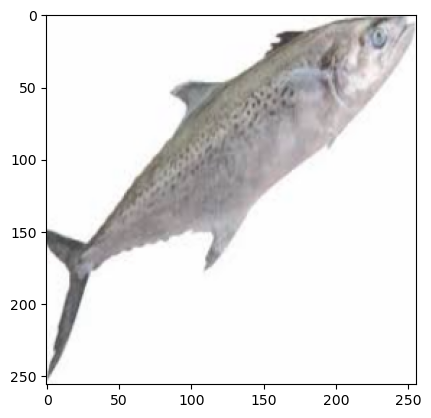

In [95]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [97]:
yhat

array([[0.6071738]], dtype=float32)

In [98]:
if yhat > 0.5: 
    print(f'Predicted class is King Mackerel')
else:
    print(f'Predicted class is Black Crappie')

Predicted class is King Mackerel


# **Save the Model**

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('models','imageclassifier.h5'))